# KE5018 Time Series Forecasting

## Load Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from pandas.tseries.offsets import DateOffset
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

## Load Data

In [2]:
train_ts_df = pd.read_csv('data/transformedTrainRatings.csv', index_col=0, parse_dates=True)
train_ts_df.head()

,week,GRPRatingsDate,GRP
weekly_date,,,
2007-06-17,0,17-Jun-2007 (25),243.60
2007-06-24,1,24-Jun-2007 (26),263.19
2007-07-01,2,01-Jul-2007 (27),269.89
2007-07-08,3,08-Jul-2007 (28),252.88
2007-07-15,4,15-Jul-2007 (29),303.46


In [3]:
test_ts_df = pd.read_csv('data/transformedTestRatings.csv', index_col=0, parse_dates=True)
test_ts_df.head()

,week,GRPRatingsDate,GRP
weekly_date,,,
2008-06-22,53,22-Jun-2008 (26),214.32
2008-06-29,54,29-Jun-2008 (27),233.76
2008-07-06,55,06-Jul-2008 (28),231.12
2008-07-13,56,13-Jul-2008 (29),224.72
2008-07-20,57,20-Jul-2008 (30),216.19


## Holt's Trend Corrected Two Parameter Exponential Smoothing

In [4]:
# Set smoothing level to None, The model will automatically optimize the value.
holt_train = sm.tsa.Holt(train_ts_df['GRP'].values, exponential=True, damped=True).fit(optimized=True)
holt_train

In [5]:
holt_train.params

{'damping_slope': 0.72305320592797395,
 'initial_level': 227.30766188323699,
 'initial_seasons': array([], dtype=float64),
 'initial_slope': 1.0770984932157752,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.5506057808610213,
 'smoothing_seasonal': nan,
 'smoothing_slope': 0.0,
 'use_boxcox': False}

In [6]:
train_ts_df['holt'] = holt_train.predict(0, len(train_ts_df)-1)
train_ts_df.head()

,week,GRPRatingsDate,GRP,holt
weekly_date,,,,
2007-06-17,0,17-Jun-2007 (25),243.60,239.848197
2007-06-24,1,24-Jun-2007 (26),263.19,251.492048
2007-07-01,2,01-Jul-2007 (27),269.89,265.277248
2007-07-08,3,08-Jul-2007 (28),252.88,273.309343
2007-07-15,4,15-Jul-2007 (29),303.46,265.935750


In [7]:
train_ts_df.tail()

,week,GRPRatingsDate,GRP,holt
weekly_date,,,,
2008-05-18,48,18-May-2008 (21),227.32,221.070534
2008-05-25,49,25-May-2008 (22),218.16,224.511528
2008-06-01,50,01-Jun-2008 (23),228.92,221.014341
2008-06-08,51,08-Jun-2008 (24),231.79,225.367243
2008-06-15,52,15-Jun-2008 (25),231.19,228.903651


In [8]:
holt_test = sm.tsa.Holt(test_ts_df['GRP'].values,
                        exponential=True,
                        damped=True).fit(smoothing_level=holt_train.params['smoothing_level'],
                                         smoothing_slope=holt_train.params['smoothing_slope'],
                                         damping_slope=holt_train.params['damping_slope'],
                                         optimized=False)
holt_test

In [9]:
test_ts_df['holt'] = holt_test.predict(0, len(test_ts_df)-1)
test_ts_df.head()

,week,GRPRatingsDate,GRP,holt
weekly_date,,,,
2008-06-22,53,22-Jun-2008 (26),214.32,224.272696
2008-06-29,54,29-Jun-2008 (27),233.76,226.092863
2008-07-06,55,06-Jul-2008 (28),231.12,235.845501
2008-07-13,56,13-Jul-2008 (29),224.72,237.280400
2008-07-20,57,20-Jul-2008 (30),216.19,233.240496


In [10]:
results_list = []

holt_train_mse = mean_squared_error(train_ts_df['GRP'].values, train_ts_df['holt'].values)
holt_train_rmse = np.sqrt(holt_train_mse)
holt_test_mse = mean_squared_error(test_ts_df['GRP'].values, test_ts_df['holt'].values)
holt_test_rmse = np.sqrt(holt_test_mse)

results_list.append([holt_train_mse, holt_train_rmse, holt_test_mse, holt_test_rmse])

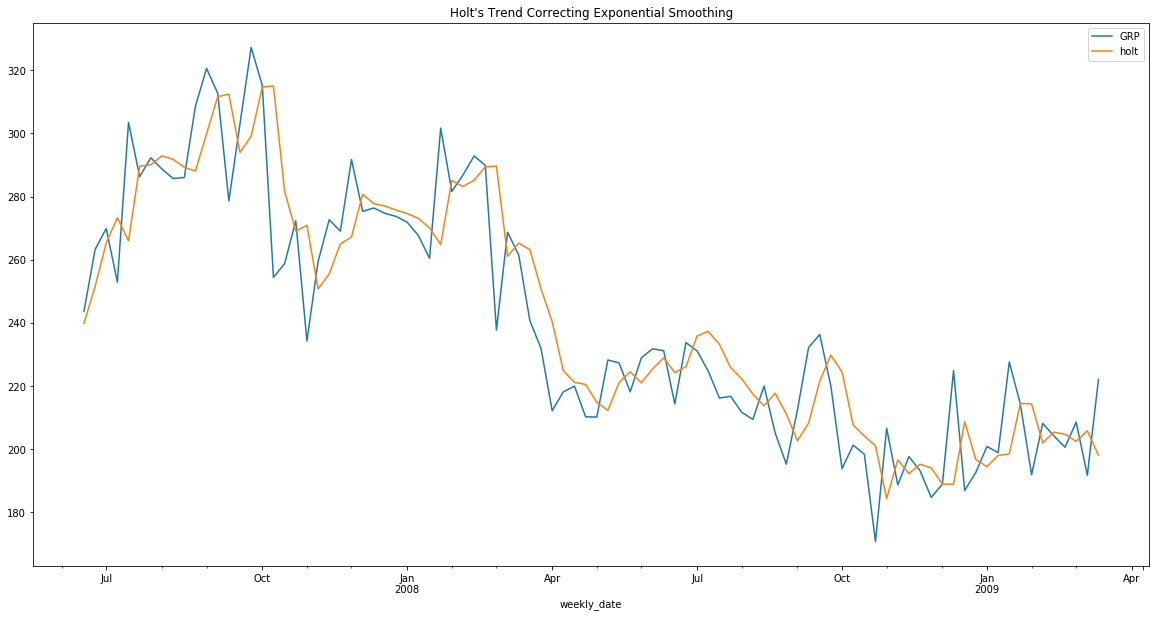

In [11]:
new_ts_df = train_ts_df.append(test_ts_df)
new_ts_df[['GRP', 'holt']].plot(figsize=(20, 10), title="Holt's Trend Correcting Exponential Smoothing")

In [12]:
residuals = train_ts_df['GRP'].values - train_ts_df['holt']
residuals[:10]

weekly_date
2007-06-17     3.751803
2007-06-24    11.697952
2007-07-01     4.612752
2007-07-08   -20.429343
2007-07-15    37.524250
2007-07-22    -3.364681
2007-07-29     2.260902
2007-08-05    -4.164552
2007-08-12    -6.059693
2007-08-19    -3.251070
Name: holt, dtype: float64

In [13]:
holt_res = Pipeline(
    [
        ('poly', PolynomialFeatures(degree=3)),
        ('linear', LinearRegression(fit_intercept=False))])
holt_res.fit(train_ts_df['week'].values.reshape(-1, 1), residuals)
holt_res_pred = holt_res.predict(train_ts_df['week'].values.reshape(-1, 1))

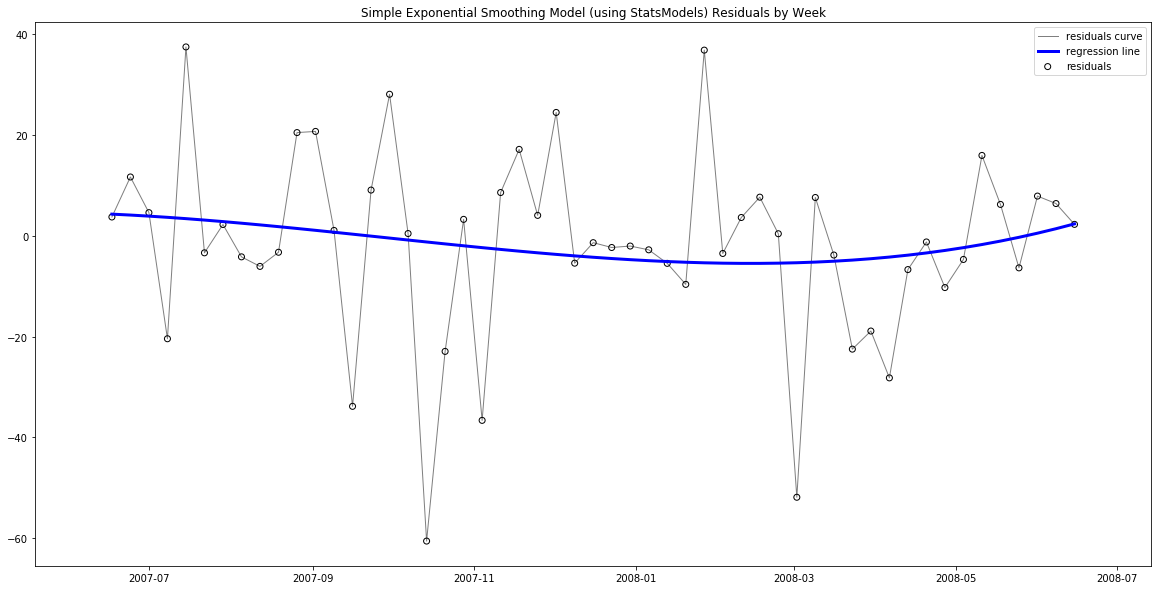

In [14]:
plt.figure(figsize=(20, 10))
plt.title('Simple Exponential Smoothing Model (using StatsModels) Residuals by Week')
plt.scatter(train_ts_df.index.values, residuals, color='black', marker='o', label='residuals', facecolors='none')
plt.plot(train_ts_df.index.values, residuals, color='black', linewidth=1, label='residuals curve', alpha=.5)
plt.plot(train_ts_df.index.values, holt_res_pred, color='blue', linewidth=3, label='regression line')
plt.legend()
plt.show()

## Additive Holt-Winters Method (three parameters)

### Reload the Data

In [15]:
train_ts_df = pd.read_csv('data/transformedTrainRatings.csv', index_col=0, parse_dates=True)
test_ts_df = pd.read_csv('data/transformedTestRatings.csv', index_col=0, parse_dates=True)

### Decompose the time series data into its trend, seasonality and residual components.

In [16]:
train_ts_df.head()

,week,GRPRatingsDate,GRP
weekly_date,,,
2007-06-17,0,17-Jun-2007 (25),243.60
2007-06-24,1,24-Jun-2007 (26),263.19
2007-07-01,2,01-Jul-2007 (27),269.89
2007-07-08,3,08-Jul-2007 (28),252.88
2007-07-15,4,15-Jul-2007 (29),303.46


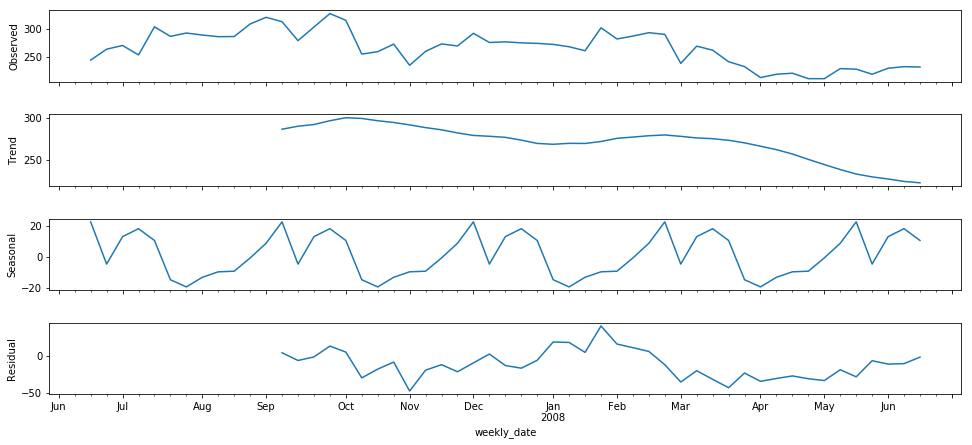

In [17]:
comp = sm.tsa.seasonal_decompose(train_ts_df['GRP'], model='additive', two_sided=False, freq=12)
fig = comp.plot()
fig.set_size_inches(15, 7)
plt.show()

In [18]:
hw_train = sm.tsa.ExponentialSmoothing(train_ts_df['GRP'], trend="additive", damped=True, seasonal="additive", seasonal_periods=12).fit(optimized=True)
hw_train

/home/tkokkeng/Documents/KE5108/TimeSeries/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


In [19]:
hw_train.params

{'damping_slope': 0.58717155109496011,
 'initial_level': 227.64844922028135,
 'initial_seasons': array([ 19.30526225,  -1.24074375,  13.43912257,  15.49600164,
         17.20202728,  -2.87494242,  -4.97073538,  -1.84384747,
         -0.97130161,  -1.60536304,   9.30604862,  18.1961298 ]),
 'initial_slope': 2.8307929635021618,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.44992840646386767,
 'smoothing_seasonal': 0.0,
 'smoothing_slope': 0.4491606391822609,
 'use_boxcox': False}

In [20]:
train_ts_df['hw'] = hw_train.predict(0, len(train_ts_df)-1)
train_ts_df.head()

,week,GRPRatingsDate,GRP,hw
weekly_date,,,,
2007-06-17,0,17-Jun-2007 (25),243.60,248.615873
2007-06-24,1,24-Jun-2007 (26),263.19,226.193865
2007-07-01,2,01-Jul-2007 (27),269.89,262.132948
2007-07-08,3,08-Jul-2007 (28),252.88,271.309386
2007-07-15,4,15-Jul-2007 (29),303.46,264.667752


In [21]:
train_ts_df.tail()

,week,GRPRatingsDate,GRP,hw
weekly_date,,,,
2008-05-18,48,18-May-2008 (21),227.32,226.132812
2008-05-25,49,25-May-2008 (22),218.16,205.715202
2008-06-01,50,01-Jun-2008 (23),228.92,227.232808
2008-06-08,51,08-Jun-2008 (24),231.79,230.976203
2008-06-15,52,15-Jun-2008 (25),231.19,233.689489


In [22]:
hw_test = sm.tsa.ExponentialSmoothing(test_ts_df['GRP'], trend="additive", damped=True,
                                      seasonal="additive", seasonal_periods=12).fit(smoothing_level=hw_train.params['smoothing_level'],
                                                                                    smoothing_slope=hw_train.params['smoothing_slope'],
                                                                                    smoothing_seasonal=hw_train.params['smoothing_seasonal'],
                                                                                    damping_slope=holt_train.params['damping_slope'],
                                                                                    optimized=False)
test_ts_df['hw'] = hw_test.predict(0, len(test_ts_df)-1)
test_ts_df.head()

/home/tkokkeng/Documents/KE5108/TimeSeries/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


,week,GRPRatingsDate,GRP,hw
weekly_date,,,,
2008-06-22,53,22-Jun-2008 (26),214.32,213.712710
2008-06-29,54,29-Jun-2008 (27),233.76,233.075583
2008-07-06,55,06-Jul-2008 (28),231.12,230.590198
2008-07-13,56,13-Jul-2008 (29),224.72,224.395125
2008-07-20,57,20-Jul-2008 (30),216.19,216.034584


In [23]:
hw_train_mse = mean_squared_error(train_ts_df['GRP'].values, train_ts_df['hw'].values)
hw_train_rmse = np.sqrt(hw_train_mse)
hw_test_mse = mean_squared_error(test_ts_df['GRP'].values, test_ts_df['hw'].values)
hw_test_rmse = np.sqrt(hw_test_mse)

results_list.append([hw_train_mse, hw_train_rmse, hw_test_mse, hw_test_rmse])

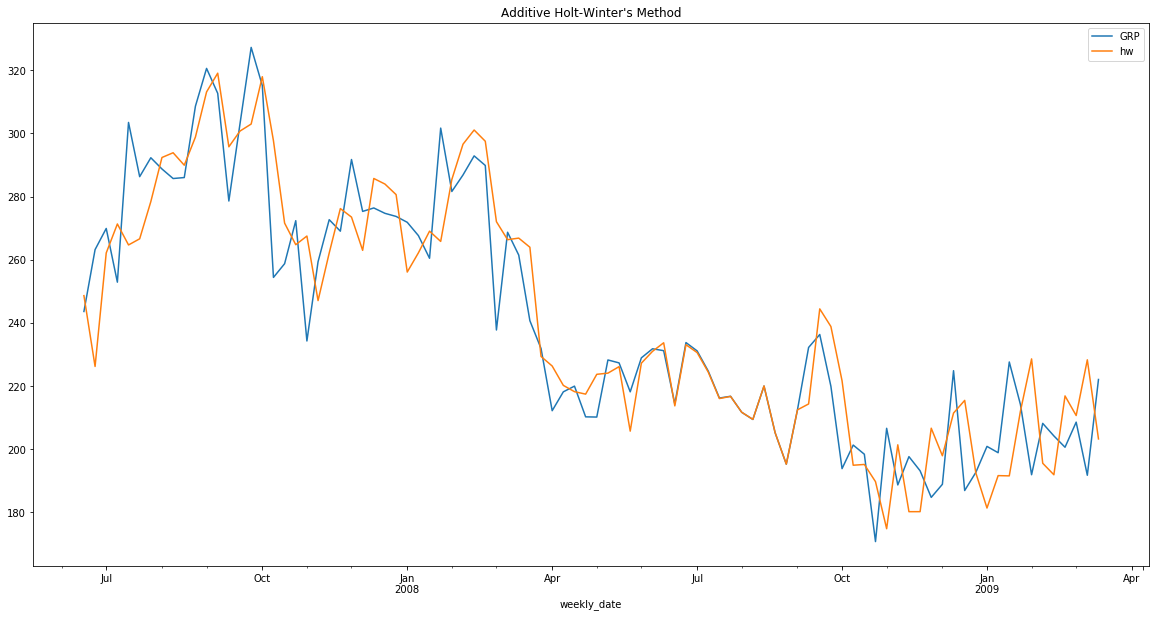

In [24]:
new_ts_df = train_ts_df.append(test_ts_df)
new_ts_df[['GRP', 'hw']].plot(figsize=(20, 10), title="Additive Holt-Winter's Method")

In [25]:
residuals = train_ts_df['GRP'].values - train_ts_df['hw']
residuals[:10]

weekly_date
2007-06-17    -5.015873
2007-06-24    36.996135
2007-07-01     7.757052
2007-07-08   -18.429386
2007-07-15    38.792248
2007-07-22    19.675072
2007-07-29    13.890201
2007-08-05    -3.641114
2007-08-12    -8.161313
2007-08-19    -3.907279
Name: hw, dtype: float64

In [26]:
hw_res = Pipeline(
    [
        ('poly', PolynomialFeatures(degree=3)),
        ('linear', LinearRegression(fit_intercept=False))])
hw_res.fit(train_ts_df['week'].values.reshape(-1, 1), residuals)
hw_res_pred = hw_res.predict(train_ts_df['week'].values.reshape(-1, 1))

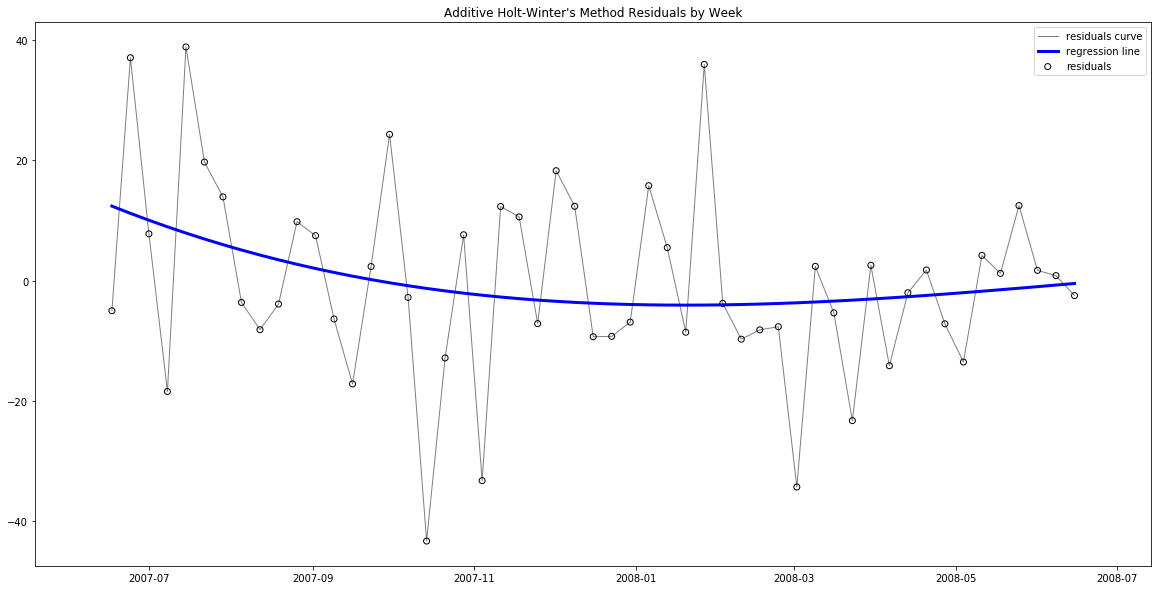

In [27]:

plt.figure(figsize=(20, 10))
plt.title("Additive Holt-Winter's Method Residuals by Week")
plt.scatter(train_ts_df.index.values, residuals, color='black', marker='o', label='residuals', facecolors='none')
plt.plot(train_ts_df.index.values, residuals, color='black', linewidth=1, label='residuals curve', alpha=.5)
plt.plot(train_ts_df.index.values, hw_res_pred, color='blue', linewidth=3, label='regression line')
plt.legend()
plt.show()

## Conclusion

In [28]:
results_df = pd.DataFrame(results_list,
                          index=["Holt's Trend Corrected Exponential Smoothing",
                                 "Additive Holt's & Winter's Method"
                                 ],
                          columns=['train mse', 'train rmse', 'test mse', 'test rmse'])
results_df

,train mse,train rmse,test mse,test rmse
Holt's Trend Corrected Exponential Smoothing,342.44791,18.505348,230.077162,15.168295
Additive Holt's & Winter's Method,255.46834,15.983377,268.821375,16.395773
